<a href="https://colab.research.google.com/github/NIKKISAHA/machineLearning/blob/main/fraud_detection2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#necess-libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#importing data
df = pd.read_csv("/content/drive/MyDrive/FastagFraudDetection.csv")

In [2]:
#viewing data
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


***Explorarory Data Analysis (EDA)***

In [10]:
data=df[['Fraud_indicator', 'Transaction_Amount','Amount_paid','Vehicle_Speed']]
data.info()

data['Fraud_indicator'].replace({'Fraud':1, 'Not Fraud':-1},inplace=True)
df.shape
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Fraud_indicator     5000 non-null   object
 1   Transaction_Amount  5000 non-null   int64 
 2   Amount_paid         5000 non-null   int64 
 3   Vehicle_Speed       5000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 156.4+ KB


<ipython-input-10-1b6b8d9667fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fraud_indicator'].replace({'Fraud':1, 'Not Fraud':-1},inplace=True)


,Fraud_indicator,Transaction_Amount,Amount_paid,Vehicle_Speed
0,1,350,120,65
1,1,120,100,78
2,-1,0,0,53
3,1,350,120,92
4,1,140,100,60


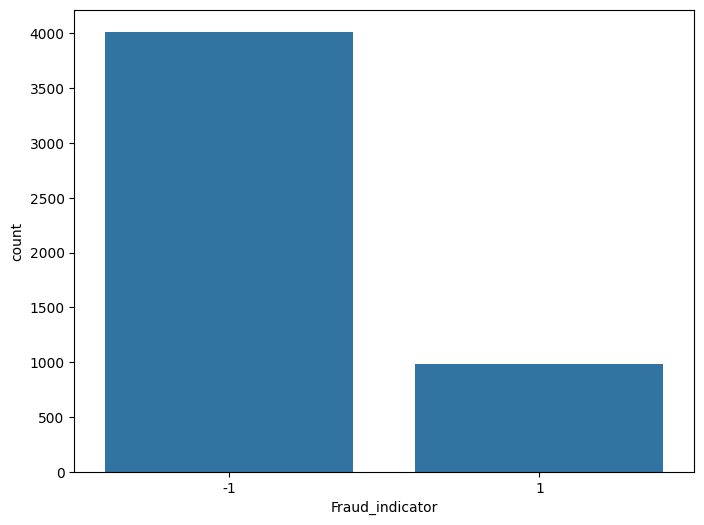

In [11]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='Fraud_indicator')
plt.xlabel='Fraud_indicator'
plt.ylabel='count'
plt.show()

***Model Training***

In [12]:
from sklearn.model_selection import train_test_split

features = data[['Transaction_Amount','Amount_paid','Vehicle_Speed']] #'Transaction_Amount','Vehicle_Speed','Amount_paid' are training variable
target = data[['Fraud_indicator']] # 'Fraud_indicator' is the target variable

# Splitting the data in two sets: training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initializing and training a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

<ipython-input-13-af249db7bc95>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

***Model Prediction & Evaluation***

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Printing evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.994
Precision: 1.0
Recall: 0.9723502304147466
F1 Score: 0.985981308411215
ROC AUC Score: 0.9861751152073732
Confusion Matrix:
[[783   0]
 [  6 211]]


In [15]:
import joblib

joblib.dump(model,'random_forest_model.pkl')

['random_forest_model.pkl']

In [17]:
from google.colab import files

files.download('random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>